# 第10章 多元线性回归

## 初始化

In [9]:
# 本章需要用到的库
import itertools # 导入itertools库
import numpy as np # 导入numpy库
import pandas as pd # 导入pandas库
import matplotlib.pyplot as plt # 导入matplotlib库
from scipy import stats # 导入scipy库的stats模块
from scipy.stats import pearsonr # 导入Pearson相关系数函数
import statsmodels.api as sm # 导入statsmodels库
from statsmodels.formula.api import ols # 导入普通最小二乘法函数
from statsmodels.stats.anova import anova_lm # 导入方差分析函数
from statsmodels.stats.outliers_influence import summary_table # 导入影响汇总表函数

# 设置初始化
plt.rcParams['font.sans-serif'] = ['SimHei'] # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False # 用来正常显示负号

## 10.1 多元线性回归模型及其参数估计

### 10.1.1 回归模型与回归方程

多元线性回归模型：$y=\beta_0+\beta_1x_1+\beta_2x_2+\cdots+\beta_kx_k+\varepsilon$
- $y$为因变量；
- $x_1,x_2,\cdots,x_k$为自变量；
- $\beta_0,\beta_1,\cdots,\beta_k$为回归系数；
- $\varepsilon$为随机误差。

估计的多元线性回归方程：$\hat{y}=\hat{\beta}_0+\hat{\beta}_1x_1+\hat{\beta}_2x_2+\cdots+\hat{\beta}_kx_k$

### 10.1.2 参数的最小二乘估计

In [2]:
example10_1 = pd.read_csv('./pydata/chap10/example10_1.csv', encoding='gbk') # 读取数据
example10_1.head() # 显示前5行数据

,餐馆编号,y,x1,x2,x3,x4,x5
0,1,53.2,163.0,168.6,6004,5,6.5
1,2,18.5,14.5,22.5,209,11,16.0
2,3,11.3,88.2,109.4,1919,10,18.2
3,4,84.7,151.6,277.0,7287,7,10.0
4,5,7.3,79.1,17.4,5311,15,17.5


In [3]:
model = ols("y~x1+x2+x3+x4+x5", data=example10_1).fit() # 拟合回归模型
model.summary() # 显示回归结果

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     21.84
Date:                Wed, 17 May 2023   Prob (F-statistic):           2.84e-07
Time:                        09:30:31   Log-Likelihood:                -91.170
No. Observations:                  25   AIC:                             194.3
Df Residuals:                      19   BIC:                             201.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.2605     10.468      0.407      0.689     -17.649      26.170
x1             0.1273      0.096      1.327      0.200      -0.074       0.328
x2             0.1606      0.056      2.884      0.010       0.044       0.277
x3             0.0008      0.001      0.563      0.580      -0.002       0.004
x4            -0.3332      0.399     -0.836      0.414      -1.168       0.501
x5            -0.5746      0.309     -1.861      0.078      -1.221       0.072
==============================================================================
Omnibus:                        2.669   Durbin-Watson:                   2.321
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                1.731
Skew:                           0.643   Prob(JB):                        0.421
Kurtosis:                       3.071   Cond. No.                     3.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [8]:
anova_table = anova_lm(model, typ=1) # 方差分析
anova_table # 显示方差分析表

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,10508.907564,10508.907564,92.738890,9.624821e-09
x2,1.0,1347.093656,1347.093656,11.887817,2.695895e-03
x3,1.0,85.431729,85.431729,0.753917,3.960742e-01
x4,1.0,40.485178,40.485178,0.357273,5.570824e-01
x5,1.0,392.537457,392.537457,3.464060,7.826181e-02
Residual,19.0,2153.026017,113.317159,NaN,NaN


估计的多元线性回归方程：$\hat{y}=4.2605+0.1273x_1+0.1606x_2+0.0008x_3-0.3332x_4-0.5746x_5$

各回归系数的实际意义：
- $\hat \beta_1 = 0.1273$：当其他自变量不变时，周边居民人数每变动1万人，日均营业额平均变动0.1273万元；
- $\hat \beta_2 = 0.1606$：当其他自变量不变时，用餐平均支出每变动1万元，日均营业额平均变动0.1606万元；
- $\hat \beta_3 = 0.0008$：当其他自变量不变时，周边居民月平均收入每变动1元，日均营业额平均变动0.0008万元；
- $\hat \beta_4 = -0.3332$：当其他自变量不变时，周边餐馆数每变动1个，日均营业额平均变动-0.3332万元；
- $\hat \beta_5 = -0.5746$：当其他自变量不变时，距市中心距离每变动1km，日均营业额平均变动-0.5746万元。

## 10.2 拟合优度和显著性检验

### 10.2.1 模型的拟合优度

In [8]:
R2 = model.rsquared # 计算决定系数
print(f'模型的多重决定系数为{R2:.4f}，即模型可解释总误差的{R2*100:.2f}%')

模型的多重决定系数为0.8518，即模型可解释总误差的85.18%


In [11]:
R2_adj = model.rsquared_adj # 计算调整后决定系数, 为避免增加自变量而高估模型的解释能力
print(f'模型的调整后决定系数为{R2_adj:.4f}，即考虑自变量个数后模型可解释总误差的{R2_adj*100:.2f}%')

模型的调整后决定系数为0.8128，即考虑自变量个数后模型可解释总误差的81.28%


### 10.2.2 模型的显著性检验

In [12]:
# 线性关系检验
F = model.fvalue # 计算F值
p_value = model.f_pvalue # 计算p值
print(f'模型的F值为{F:.4f}，p值为{p_value:.4f}')

模型的F值为21.8404，p值为0.0000


由于P<0.05, 模型的线性关系显著。

In [16]:
# 回归系数检验
t = model.tvalues # 计算t值
p = model.pvalues # 计算p值
print(f'x1回归系数的t值为{t.values[1]:.4f}，p值为{p.values[1]:.4f}')
print(f'x2回归系数的t值为{t.values[2]:.4f}，p值为{p.values[2]:.4f}')
print(f'x3回归系数的t值为{t.values[3]:.4f}，p值为{p.values[3]:.4f}')
print(f'x4回归系数的t值为{t.values[4]:.4f}，p值为{p.values[4]:.4f}')
print(f'x5回归系数的t值为{t.values[5]:.4f}，p值为{p.values[5]:.4f}')

x1回归系数的t值为1.3266，p值为0.2004
x2回归系数的t值为2.8836，p值为0.0095
x3回归系数的t值为0.5633，p值为0.5798
x4回归系数的t值为-0.8359，p值为0.4136
x5回归系数的t值为-1.8612，p值为0.0783


结果表明：
- x2的回归系数检验P<0.05，说明x2对y有显著影响。
- 其余自变量对y的影响未通过显著性检验，但可能由于其他原因造成的（如多重共线性等）。

### 10.2.3 模型诊断

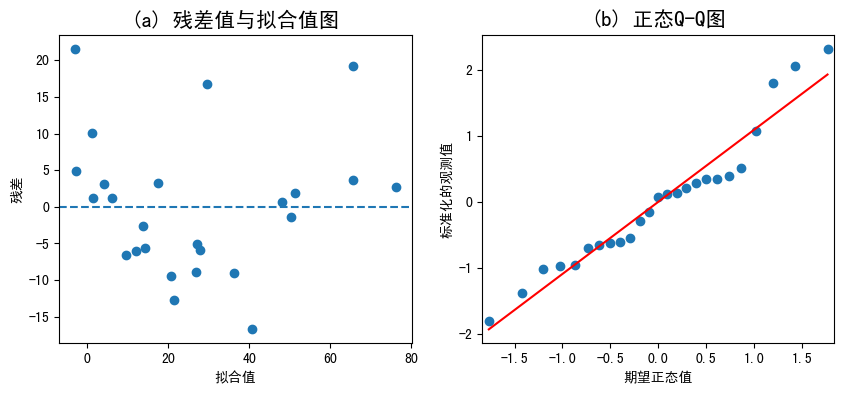

In [17]:
# 残差的正态性与方差齐性
plt.subplots(1, 2, figsize=(10, 4)) # 设置画布大小

plt.subplot(121) # 创建第一个子图
plt.scatter(model.fittedvalues, model.resid) # 绘制散点图
plt.axhline(0, linestyle='--') # 绘制e=0的直线
plt.xlabel('拟合值') # 设置x轴标签
plt.ylabel('残差') # 设置y轴标签
plt.title('(a) 残差值与拟合值图', fontsize=15) # 设置子图标题

ax2 = plt.subplot(122) # 创建第二个子图
pplot = sm.ProbPlot(model.resid, fit=True) # 创建概率图对象
pplot.qqplot(line='r', ax=ax2, xlabel='期望正态值', ylabel='标准化的观测值') # 绘制Q-Q图
ax2.set_title('(b) 正态Q-Q图', fontsize=15) # 设置子图标题

plt.show()

诊断图表明：
- 残差分布似乎不是很随机，可以考虑模型设定问题导致的异方差性；
- 残差基本满足正态性假定。

## 10.3 多重共线性及其处理

### 10.3.1 多重共线性及其识别

In [18]:
corr = example10_1.iloc[:, 2:].corr() # 计算相关系数矩阵
corr # 显示相关系数矩阵

,x1,x2,x3,x4,x5
x1,1.000000,0.738110,0.883217,-0.623146,-0.277501
x2,0.738110,1.000000,0.553441,-0.538228,-0.323101
x3,0.883217,0.553441,1.000000,-0.522543,-0.290963
x4,-0.623146,-0.538228,-0.522543,1.000000,0.095279
x5,-0.277501,-0.323101,-0.290963,0.095279,1.000000


In [20]:
col = ['x1', 'x2', 'x3', 'x4', 'x5'] # 自变量名称
df_pvalue = pd.DataFrame(columns=col, index=col) # 创建p值的数据框
for i in range(2, 7): # 遍历自变量
    for j in range(2, 7): # 遍历自变量
        cor, p_value = pearsonr(example10_1.iloc[:, i], example10_1.iloc[:, j]) # 计算相关系数和p值
        df_pvalue.iloc[i-2, j-2] = p_value # 将p值存入数据框
df_pvalue # 显示p值的数据框

,x1,x2,x3,x4,x5
x1,0.0,0.000025,0.0,0.000876,0.179264
x2,0.000025,0.0,0.004107,0.005513,0.115166
x3,0.0,0.004107,0.0,0.007367,0.15822
x4,0.000876,0.005513,0.007367,0.0,0.65052
x5,0.179264,0.115166,0.15822,0.65052,0.0


自变量相关系数检验结果表明：
- 只有x5(距市中心距离)与其他4个自变量之间的关系不显著，其他4个自变量两两之间均显著相关；
- 多元线性回归模型中可能存在多重共线性。

In [21]:
# 计算容忍度和VIF
def vif(df_exog, exog_name):
    exog_use = list(df_exog.columns) # 提取自变量名称
    exog_use.remove(exog_name) # 剔除当前自变量
    model = ols(f'{exog_name}~{"+".join(exog_use)}', data=df_exog).fit() # 拟合回归模型
    rsq = model.rsquared # 计算决定系数
    return 1. / (1. - rsq) # 返回方差膨胀因子

df_vif = pd.DataFrame() # 创建空数据框
for x in ['x1', 'x2', 'x3', 'x4', 'x5']: # 遍历自变量
    vif_i = vif(example10_1.iloc[:, 2:], x) # 计算方差膨胀因子
    df_vif.loc['VIF', x] = vif_i # 将方差膨胀因子存入数据框

df_vif.loc['tolerance'] = 1 / df_vif.loc['VIF'] # 计算容忍度
df_vif # 显示容忍度和方差膨胀因子

,x1,x2,x3,x4,x5
VIF,8.233159,2.629940,5.184365,1.702361,1.174053
tolerance,0.121460,0.380237,0.192888,0.587420,0.851750


结果表明：
- $VIF \ge 5$ 表明存在多重共线性，需要进行处理。
- $容忍度 > 0.1$ 表明多重共线性不严重。 

### 10.3.2 变量选择与逐步回归

In [27]:
# 根据AIC进行变量选择
step_reg = pd.DataFrame() # 创建空数据框
x = ['x1', 'x2', 'x3', 'x4', 'x5'] # 自变量名称
for i in range(1, len(x)+1): # 遍历自变量个数
    for j in itertools.combinations(x, i): # 遍历所有非空子集
        model = ols(f'y~{"+".join(j)}', data=example10_1).fit() # 拟合回归模型
        step_reg_model = pd.DataFrame({'x': [j], 'AIC': [model.aic]})
        step_reg = pd.concat([step_reg, step_reg_model], ignore_index=True) # 将结果存入数据框
step_reg.sort_values(by='AIC', inplace=True) # 按AIC值升序排列
step_reg # 显示AIC值的数据框 AIC越小越好

,x,AIC
17,"(x1, x2, x5)",191.632516
27,"(x1, x2, x4, x5)",192.754822
26,"(x1, x2, x3, x5)",193.243588
5,"(x1, x2)",193.734732
22,"(x2, x3, x5)",194.190603
30,"(x1, x2, x3, x4, x5)",194.340771
29,"(x2, x3, x4, x5)",194.555326
15,"(x1, x2, x3)",194.922190
9,"(x2, x3)",194.929697
16,"(x1, x2, x4)",195.387829


In [5]:
# 根据AIC的最小值选择最优模型的自变量为：x1、x2、x5
model2 = ols("y~x1+x2+x5", data=example10_1).fit() # 拟合回归模型
model2.summary() # 显示回归结果

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     37.85
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.19e-08
Time:                        09:30:45   Log-Likelihood:                -91.816
No. Observations:                  25   AIC:                             191.6
Df Residuals:                      21   BIC:                             196.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6893      6.252     -0.270      0.790     -14.692      11.313
x1             0.1902      0.048      3.923      0.001       0.089       0.291
x2             0.1576      0.051      3.120      0.005       0.053       0.263
x5            -0.5698      0.294     -1.935      0.067      -1.182       0.043
==============================================================================
Omnibus:                        3.491   Durbin-Watson:                   2.555
Prob(Omnibus):                  0.175   Jarque-Bera (JB):                2.409
Skew:                           0.759   Prob(JB):                        0.300
Kurtosis:                       3.092   Cond. No.                         495.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
anova_table2 = anova_lm(model2, typ=1) # 方差分析
anova_table2 # 显示方差分析表

,df,sum_sq,mean_sq,F,PR(>F)
x1,1.0,10508.907564,10508.907564,97.339177,2.452138e-09
x2,1.0,1347.093656,1347.093656,12.477509,1.975601e-03
x5,1.0,404.283704,404.283704,3.744694,6.655774e-02
Residual,21.0,2267.196677,107.961747,NaN,NaN


最终估计的回归方程为：$\hat{y}=-1.6893+0.1902x_1+0.1576x_2-0.5698x_5$

各回归系数的实际意义：
- $\hat \beta_1 = 0.1902$：当其他自变量不变时，周边居民人数每变动1万人，日均营业额平均变动0.1902万元；
- $\hat \beta_2 = 0.1576$：当其他自变量不变时，用餐平均支出每变动1万元，日均营业额平均变动0.1576万元；
- $\hat \beta_5 = -0.5698$：当其他自变量不变时，距市中心距离每变动1km，日均营业额平均变动-0.5698万元。

$x_1$与$x_2$的回归系数检验P<0.05，$x_5$的回归系数检验P<0.10，与原模型的相比多重共线性得到了一定程度的缓解。

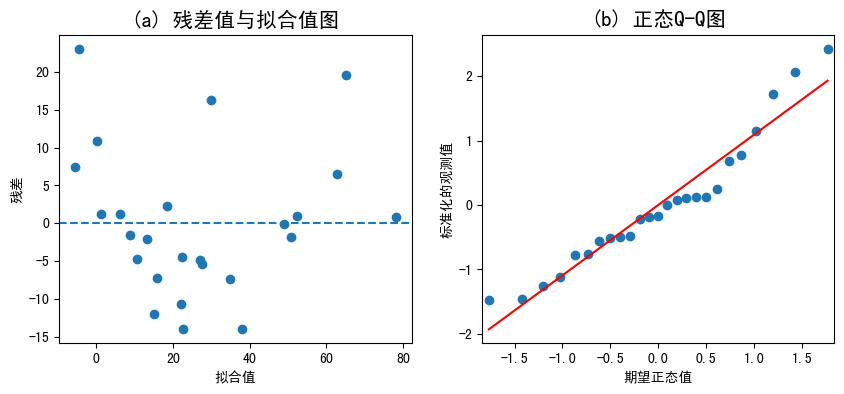

In [30]:
# 残差的正态性与方差齐性
plt.subplots(1, 2, figsize=(10, 4)) # 设置画布大小

plt.subplot(121) # 创建第一个子图
plt.scatter(model2.fittedvalues, model2.resid) # 绘制散点图
plt.axhline(0, linestyle='--') # 绘制e=0的直线
plt.xlabel('拟合值') # 设置x轴标签
plt.ylabel('残差') # 设置y轴标签
plt.title('(a) 残差值与拟合值图', fontsize=15) # 设置子图标题

ax2 = plt.subplot(122) # 创建第二个子图
pplot = sm.ProbPlot(model2.resid, fit=True) # 创建概率图对象
pplot.qqplot(line='r', ax=ax2, xlabel='期望正态值', ylabel='标准化的观测值') # 绘制Q-Q图
ax2.set_title('(b) 正态Q-Q图', fontsize=15) # 设置子图标题

plt.show()

从诊断图可以看出，新模型的残差分布与原模型相比，并没有明显的改善，模型仍有改进的空间，比如采用非线性模型。

## 10.4 相对重要性和模型比较

### 10.4.1 自变量的相对重要性

In [16]:
df= example10_1.drop(['餐馆编号'], axis=1) # 删除餐馆编号列
df = stats.zscore(df) # 计算标准化后的数据
df.columns = ['zy', 'zx1', 'zx2', 'zx3', 'zx4', 'zx5'] # 重命名列名
df.head() # 显示前5行数据

,zy,zx1,zx2,zx3,zx4,zx5
0,1.109931,0.973605,1.116301,0.225563,-0.918419,-0.715777
1,-0.329545,-1.359540,-1.239969,-1.394988,-0.057401,0.555704
2,-0.628225,-0.201609,0.161536,-0.916793,-0.200904,0.850152
3,2.416660,0.794495,2.864553,0.584349,-0.631413,-0.247336
4,-0.794159,-0.344583,-1.322220,0.031768,0.516610,0.756464


In [17]:
modelz = ols("zy~zx1+zx2+zx3+zx4+zx5", data=df).fit() # 拟合回归模型
modelz.summary() # 显示回归结果

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     zy   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     21.84
Date:                Wed, 17 May 2023   Prob (F-statistic):           2.84e-07
Time:                        09:36:03   Log-Likelihood:                -11.609
No. Observations:                  25   AIC:                             35.22
Df Residuals:                      19   BIC:                             42.53
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -9.285e-17      0.088  -1.05e-15      1.000      -0.185       0.185
zx1            0.3362      0.253      1.327      0.200      -0.194       0.867
zx2            0.4130      0.143      2.884      0.010       0.113       0.713
zx3            0.1133      0.201      0.563      0.580      -0.308       0.534
zx4           -0.0963      0.115     -0.836      0.414      -0.338       0.145
zx5           -0.1781      0.096     -1.861      0.078      -0.378       0.022
==============================================================================
Omnibus:                        2.669   Durbin-Watson:                   2.321
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                1.731
Skew:                           0.643   Prob(JB):                        0.421
Kurtosis:                       3.071   Cond. No.                         6.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

结果显示，$\bar \beta_1$ = 0.3362, 表示在其他自变量不变的情况下，周边居民人数每变动1个标准差，日均营业额平均变动0.3362个标准差。其他系数的含义类似。

标准化回归方程系数的绝对值大小可以反映自变量对因变量的相对重要性。$|\bar \beta_2| > |\bar \beta_1|> |\bar \beta_5| > |\bar \beta_3| > |\bar \beta_4|$，说明用餐平均支出是预测日均营业额最重要的变量，而周边餐馆数则是最不重要的变量。

### 10.4.2 模型比较

In [26]:
# 用anova比较两个模型
model1 = ols("y~x1+x2+x3+x4+x5", data=example10_1).fit() # 拟合回归模型
model2 = ols("y~x1+x2+x5", data=example10_1).fit() # 拟合回归模型
anova_lm(model2, model1, typ=1) # 方差分析

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,21.0,2267.196677,0.0,NaN,NaN,NaN
1,19.0,2153.026017,2.0,114.17066,0.503766,0.612098


使用残差平方和作比较的结果表明，由于P>0.05，没有证据显示两个模型有显著差异，即两个模型的拟合优度没有显著差异。

In [21]:
# 用AIC比较两个模型
pd.DataFrame({'AIC': [model1.aic, model2.aic]}, index=['模型1', '模型2']) # 显示AIC值

,AIC
模型1,194.340771
模型2,191.632516


使用AIC的比较结果表明，由于model2的AIC值更小，意味着它比包含全部5个自变量的模型更好。

## 10.5 利用回归方差进行预测

In [41]:
model = ols("y~x1+x2+x5", data=example10_1).fit() # 拟合回归模型

conf_level = 0.95 # 置信水平
st, _, _ = summary_table(model, alpha=1-conf_level) # 计算点预测值、置信区间和预测区间
columns = [x + ' ' + y for (x, y) in zip(st.data[0], st.data[1])] # 构建列名
# 双重索引列名
df_res = pd.DataFrame(st.data[2:], columns=columns) # 创建数据框
df_res.drop(
    columns=['Std Error Mean Predict', 'Std Error Residual', 'Student Residual'], inplace=True
) # 删除不需要的列
round(df_res, 2) # 显示结果

,Obs,Dep Var Population,Predicted Value,Mean ci 95% low,Mean ci 95% upp,Predict ci 95% low,Predict ci 95% upp,Residual,Cook's D
0,1.0,53.2,52.19,45.46,58.92,29.56,74.82,1.01,0.00
1,2.0,18.5,-4.50,-11.97,2.97,-27.36,18.36,23.00,0.19
2,3.0,11.3,21.96,15.69,28.24,-0.54,44.46,-10.66,0.03
3,4.0,84.7,65.11,49.30,80.93,38.34,91.89,19.59,2.21
4,5.0,7.3,6.13,-2.28,14.54,-17.06,29.32,1.17,0.00
5,6.0,17.9,22.41,14.58,30.24,-0.57,45.39,-4.51,0.01
6,7.0,2.5,1.28,-6.11,8.67,-21.56,24.12,1.22,0.00
7,8.0,27.3,34.72,28.40,41.04,12.21,57.23,-7.42,0.01
8,9.0,5.9,10.63,4.90,16.35,-11.73,32.98,-4.73,0.00
9,10.0,23.9,37.84,32.19,43.49,15.51,60.18,-13.94,0.04


In [42]:
# 求x1=50, x2=100, x5=10时y的点预测值
model.predict(exog=dict(x1=50, x2=100, x5=10))

0    17.886847
dtype: float64

## 10.6 哑变量回归

### 10.6.1 在模型中引入哑变量

### 10.6.2 含有一个哑变量的回归

In [45]:
example10_7 = pd.read_csv('./pydata/chap10/example10_7.csv', encoding='gbk') # 读取数据
example10_7.head() # 显示前5行数据

,餐馆编号,日均营业额,用餐平均支出,交通方便程度
0,1,53.2,168.6,方便
1,2,18.5,22.5,方便
2,3,11.3,109.4,不方便
3,4,84.7,277.0,方便
4,5,7.3,17.4,不方便


In [46]:
models = ols("日均营业额~用餐平均支出", data=example10_7).fit() # 拟合回归模型
models.summary() # 显示回归结果

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  日均营业额   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     52.23
Date:                Wed, 17 May 2023   Prob (F-statistic):           2.34e-07
Time:                        10:06:41   Log-Likelihood:                -100.22
No. Observations:                  25   AIC:                             204.4
Df Residuals:                      23   BIC:                             206.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.7502      5.251     -1.095      0.285     -16.612       5.112
用餐平均支出         0.3239      0.045      7.227      0.000       0.231       0.417
==============================================================================
Omnibus:                        2.129   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.345   Jarque-Bera (JB):                1.580
Skew:                           0.609   Prob(JB):                        0.454
Kurtosis:                       2.815   Cond. No.                         221.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
anova_lm(models, typ=1) # 方差分析

,df,sum_sq,mean_sq,F,PR(>F)
用餐平均支出,1.0,10085.879366,10085.879366,52.227825,2.342873e-07
Residual,23.0,4441.602234,193.113141,NaN,NaN


回归结果表明：
- $R^2$ = 0.694, 表示用餐平均支出解释了日均营业额误差的69.4%；
- F检验P<0.05，表示模型显著；
- 回归系数$\hat \beta_1$ = 0.3239，表示用餐平均支出每变动1元，日均营业额平均变动0.3239万元。

In [48]:
# 引入交通方便程度类别变量
modeld = ols("日均营业额~用餐平均支出+交通方便程度", data=example10_7).fit() # 拟合回归模型
modeld.summary() # 显示回归结果

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  日均营业额   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     38.02
Date:                Wed, 17 May 2023   Prob (F-statistic):           7.27e-08
Time:                        10:10:15   Log-Likelihood:                -96.356
No. Observations:                  25   AIC:                             198.7
Df Residuals:                      22   BIC:                             202.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -8.4541      4.698     -1.799      0.086     -18.198       1.289
交通方便程度[T.方便]    14.6209      5.178      2.824      0.010       3.882      25.359
用餐平均支出           0.2864      0.041      6.909      0.000       0.200       0.372
==============================================================================
Omnibus:                        1.594   Durbin-Watson:                   2.420
Prob(Omnibus):                  0.451   Jarque-Bera (JB):                1.153
Skew:                           0.273   Prob(JB):                        0.562
Kurtosis:                       2.100   Cond. No.                         263.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
anova_lm(modeld, typ=1) # 方差分析

,df,sum_sq,mean_sq,F,PR(>F)
交通方便程度,1.0,4193.122184,4193.122184,28.296158,2.439564e-05
用餐平均支出,1.0,7074.245908,7074.245908,47.738648,6.145195e-07
Residual,22.0,3260.113508,148.186978,NaN,NaN


估计的回归方程为：
- $\hat{y} = -8.4541 + 0.3239 \times 用餐平均支出 + 14.6209 \times 交通方便程度$

回归结果表明：
- F检验P<0.05，表示模型显著；
- 回归系数$\hat \beta_1$ = 0.3239，表示用餐平均支出每变动1元，日均营业额平均变动0.3239万元；
- 回归系数$\hat \beta_2$ = 14.6209，表示交通方便程度为“方便”时，日均营业额平均比交通“不方便”的地段高14.6209万元。
- 回归系数的t检验P均小于0.05，说明两个回归系数都显著。
- 调整的决定系数$R^2_a$=0.755，表示用餐平均支出和交通方便程度共同解释了日均营业额误差的75.5%，比原模型拟合优度更高。

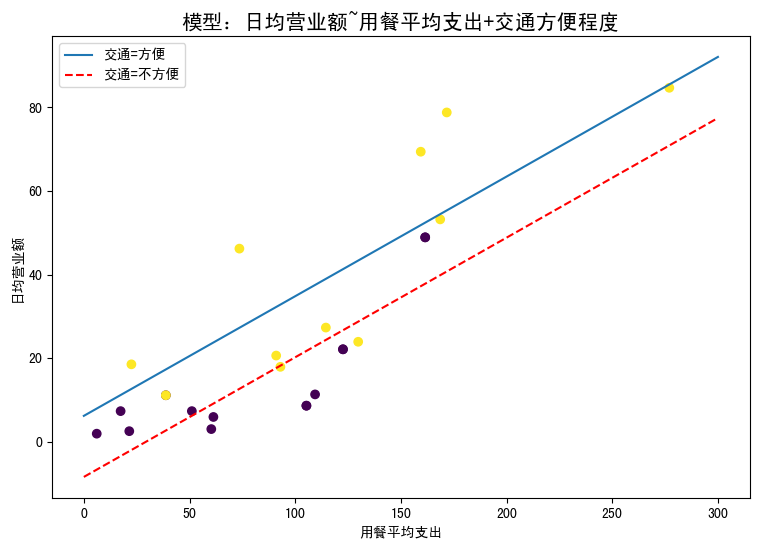

In [66]:
plt.figure(figsize=(9, 6)) # 设置画布大小
plt.scatter(
    example10_7['用餐平均支出'], example10_7['日均营业额'], 
    c=(example10_7['交通方便程度'] == '方便')
) # 绘制散点图
slope = modeld.params['用餐平均支出'] # 提取斜率
intercept1 = modeld.params['Intercept'] # 提取截距
intercept2 = intercept1 + modeld.params['交通方便程度[T.方便]'] # 提取截距
x = np.array([0, 300]) # 设置x轴取值
plt.plot(x, slope*x+intercept2, label='交通=方便') # 绘制回归直线-方便
plt.plot(x, slope*x+intercept1, 'r--', label='交通=不方便') # 绘制回归直线-不方便
plt.legend() # 显示图例
plt.xlabel('用餐平均支出') # 设置x轴标签
plt.ylabel('日均营业额') # 设置y轴标签
plt.title('模型：日均营业额~用餐平均支出+交通方便程度', fontsize=15) # 设置标题
plt.show()

In [67]:
# 哑变量回归预测
df_res = example10_7.copy() # 复制数据
df_res['点预测值'] = modeld.fittedvalues # 提取点预测值
df_res['残差'] = modeld.resid # 提取残差
round(df_res, 4) # 显示结果

,餐馆编号,日均营业额,用餐平均支出,交通方便程度,点预测值,残差
0,1,53.2,168.6,方便,54.4561,-1.2561
1,2,18.5,22.5,方便,12.6111,5.8889
2,3,11.3,109.4,不方便,22.8795,-11.5795
3,4,84.7,277.0,方便,85.5033,-0.8033
4,5,7.3,17.4,不方便,-3.4705,10.7705
5,6,17.9,93.0,方便,32.8032,-14.9032
6,7,2.5,21.5,不方便,-2.2962,4.7962
7,8,27.3,114.5,方便,38.9611,-11.6611
8,9,5.9,61.3,不方便,9.1030,-3.2030
9,10,23.9,129.8,方便,43.3433,-19.4433


In [68]:
# 用anova比较两个模型-是否引入交通方便程度哑变量
models = ols("日均营业额~用餐平均支出", data=example10_7).fit() # 拟合回归模型
modeld = ols("日均营业额~用餐平均支出+交通方便程度", data=example10_7).fit() # 拟合回归模型
anova_lm(models, modeld, typ=1) # 方差分析

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,23.0,4441.602234,0.0,NaN,NaN,NaN
1,22.0,3260.113508,1.0,1181.488726,7.972959,0.009889


由于P<0.05，表明两个模型有显著差异。

In [69]:
# 用AIC比较两个模型-是否引入交通方便程度哑变量
pd.DataFrame({'AIC': [models.aic, modeld.aic]}, index=['模型1', '模型2']) # 显示AIC值

,AIC
模型1,204.444292
模型2,198.712963


哑变量回归模型的AIC值更小，意味着引入交通方便程度哑变量后，模型得到了改进。

## 习题

### 10.1

In [70]:
df = pd.read_csv('./exercise/chap10/exercise10_1.csv', encoding='gbk') # 读取数据
df.head() # 显示前5行数据

,不良贷款,贷款余额,应收贷款,贷款项目个数,固定资产投资
0,0.9,67.3,6.8,5,51.9
1,1.1,111.3,19.8,16,90.9
2,4.8,173.0,7.7,17,73.7
3,3.2,80.8,7.2,10,14.5
4,7.8,199.7,16.5,19,63.2


In [71]:
# (1) 用不良贷款作因变量，建立多元线性回归模型
model = ols("不良贷款~贷款余额+应收贷款+贷款项目个数+固定资产投资", data=df).fit() # 拟合回归模型
model.summary() # 显示回归结果

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   不良贷款   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     19.70
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.04e-06
Time:                        10:52:52   Log-Likelihood:                -47.082
No. Observations:                  25   AIC:                             104.2
Df Residuals:                      20   BIC:                             110.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0216      0.782     -1.306      0.206      -2.654       0.610
贷款余额           0.0400      0.010      3.837      0.001       0.018       0.062
应收贷款           0.1480      0.079      1.879      0.075      -0.016       0.312
贷款项目个数         0.0145      0.083      0.175      0.863      -0.159       0.188
固定资产投资        -0.0292      0.015     -1.937      0.067      -0.061       0.002
==============================================================================
Omnibus:                        0.316   Durbin-Watson:                   2.626
Prob(Omnibus):                  0.854   Jarque-Bera (JB):                0.442
Skew:                           0.220   Prob(JB):                        0.802
Kurtosis:                       2.520   Cond. No.                         352.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

估计的回归方程为：
- $\hat{y} = -1.0216 + 0.0400 \times 贷款余额 + 0.1480 \times 应收贷款 + 0.0145 \times 贷款项目个数 - 0.0292 \times 固定资产投资$

回归系数的含义：
- $\hat \beta_1 = 0.0400$：当其他自变量不变时，贷款余额每变动1亿元，不良贷款平均变动0.0400亿元；
- $\hat \beta_2 = 0.1480$：当其他自变量不变时，应收贷款每变动1亿元，不良贷款平均变动0.1480亿元；
- $\hat \beta_3 = 0.0145$：当其他自变量不变时，贷款项目个数每变动1个，不良贷款平均变动0.0145亿元；
- $\hat \beta_4 = -0.0292$：当其他自变量不变时，固定资产投资每变动1亿元，不良贷款平均变动-0.0292亿元。

In [72]:
# (2) 分析模型中是否存在多重共线性。
corr = df.iloc[:, 1:].corr() # 计算相关系数矩阵
corr # 显示相关系数矩阵

,贷款余额,应收贷款,贷款项目个数,固定资产投资
贷款余额,1.000000,0.678772,0.848416,0.779702
应收贷款,0.678772,1.000000,0.585831,0.472431
贷款项目个数,0.848416,0.585831,1.000000,0.746646
固定资产投资,0.779702,0.472431,0.746646,1.000000


In [73]:
col = ['贷款余额', '应收贷款', '贷款项目个数', '固定资产投资'] # 自变量名称
df_pvalue = pd.DataFrame(columns=col, index=col) # 创建p值的数据框
for i in range(1, 5): # 遍历自变量
    for j in range(1, 5): # 遍历自变量
        cor, p_value = pearsonr(example10_1.iloc[:, i], example10_1.iloc[:, j]) # 计算相关系数和p值
        df_pvalue.iloc[i-2, j-2] = p_value # 将p值存入数据框
df_pvalue # 显示p值的数据框

,贷款余额,应收贷款,贷款项目个数,固定资产投资
贷款余额,0.0,0.000025,0.0,0.0
应收贷款,0.000025,0.0,0.004107,0.0
贷款项目个数,0.0,0.004107,0.0,0.000023
固定资产投资,0.0,0.0,0.000023,0.0


自变量相关系数检验结果表明, 各个自变量之间均显著相关，存在多重共线性。

In [75]:
def vif(df_exog, exog_name):
    exog_use = list(df_exog.columns) # 提取自变量名称
    exog_use.remove(exog_name) # 剔除当前自变量
    model = ols(f'{exog_name}~{"+".join(exog_use)}', data=df_exog).fit() # 拟合回归模型
    rsq = model.rsquared # 计算决定系数
    return 1. / (1. - rsq) # 返回方差膨胀因子

df_vif = pd.DataFrame() # 创建空数据框
for x in ['贷款余额', '应收贷款', '贷款项目个数', '固定资产投资']: # 遍历自变量
    vif_i = vif(df.iloc[:, 1:], x) # 计算方差膨胀因子
    df_vif.loc['VIF', x] = vif_i # 将方差膨胀因子存入数据框

df_vif.loc['tolerance'] = 1 / df_vif.loc['VIF'] # 计算容忍度
df_vif # 显示容忍度和方差膨胀因子

,贷款余额,应收贷款,贷款项目个数,固定资产投资
VIF,5.330807,1.88986,3.834823,2.781220
tolerance,0.187589,0.52914,0.260768,0.359554


结果表明：
- $VIF \ge 5$ 表明存在多重共线性，需要进行处理。
- $容忍度 > 0.1$ 表明多重共线性不严重。 

In [78]:
# (3) 比较4个自变量在不良贷款中的相对重要性。
dfz = df.copy() # 复制数据
dfz = stats.zscore(dfz) # 计算标准化后的数据
dfz.columns = ['z不良贷款', 'z贷款余额', 'z应收贷款', 'z贷款项目个数', 'z固定资产投资'] # 重命名列名
dfz.head() # 显示前5行数据

,z不良贷款,z贷款余额,z应收贷款,z贷款项目个数,z固定资产投资
0,-0.799687,-0.672838,-0.468521,-1.201417,-0.180078
1,-0.743132,-0.113918,1.625968,0.109653,0.810755
2,0.303134,0.669841,-0.323518,0.228841,0.373773
3,-0.149305,-0.501352,-0.404075,-0.605476,-1.130261
4,1.151458,1.009004,1.094290,0.467218,0.107010


In [79]:
modelz = ols("z不良贷款~z贷款余额+z应收贷款+z贷款项目个数+z固定资产投资", data=dfz).fit() # 拟合回归模型
modelz.summary() # 显示回归结果

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  z不良贷款   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.757
Method:                 Least Squares   F-statistic:                     19.70
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.04e-06
Time:                        11:03:19   Log-Likelihood:                -15.504
No. Observations:                  25   AIC:                             41.01
Df Residuals:                      20   BIC:                             47.10
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.928e-17      0.101  -1.92e-16      1.000      -0.210       0.210
z贷款余额          0.8913      0.232      3.837      0.001       0.407       1.376
z应收贷款          0.2598      0.138      1.879      0.075      -0.029       0.548
z贷款项目个数        0.0345      0.197      0.175      0.863      -0.376       0.445
z固定资产投资       -0.3249      0.168     -1.937      0.067      -0.675       0.025
==============================================================================
Omnibus:                        0.316   Durbin-Watson:                   2.626
Prob(Omnibus):                  0.854   Jarque-Bera (JB):                0.442
Skew:                           0.220   Prob(JB):                        0.802
Kurtosis:                       2.520   Cond. No.                         4.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$|\bar \beta_1| > |\bar \beta_4| > |\bar \beta_2| > |\bar \beta_3|$，说明应收贷款是预测不良贷款最重要的变量，而贷款项目个数则是最不重要的变量。

In [77]:
# (4) 用anova和AIC两种方法对模型进行比较和分析。
# 使用AIC进行变量选择
step_reg = pd.DataFrame() # 创建空数据框
x = ['贷款余额', '应收贷款', '贷款项目个数', '固定资产投资'] # 自变量名称
for i in range(1, len(x)+1): # 遍历自变量个数
    for j in itertools.combinations(x, i): # 遍历所有非空子集
        model = ols(f'不良贷款~{"+".join(j)}', data=df).fit() # 拟合回归模型
        step_reg_model = pd.DataFrame({'x': [j], 'AIC': [model.aic]})
        step_reg = pd.concat([step_reg, step_reg_model], ignore_index=True) # 将结果存入数据框
step_reg.sort_values(by='AIC', inplace=True) # 按AIC值升序排列
step_reg # 显示AIC值的数据框 AIC越小越好

,x,AIC
11,"(贷款余额, 应收贷款, 固定资产投资)",102.202190
14,"(贷款余额, 应收贷款, 贷款项目个数, 固定资产投资)",104.163946
6,"(贷款余额, 固定资产投资)",104.315035
4,"(贷款余额, 应收贷款)",104.586108
12,"(贷款余额, 贷款项目个数, 固定资产投资)",106.227178
10,"(贷款余额, 应收贷款, 贷款项目个数)",106.461332
0,"(贷款余额,)",107.015904
5,"(贷款余额, 贷款项目个数)",108.942245
7,"(应收贷款, 贷款项目个数)",114.032461
13,"(应收贷款, 贷款项目个数, 固定资产投资)",115.958123


In [82]:
model1 = ols("不良贷款~贷款余额+应收贷款+贷款项目个数+固定资产投资", data=df).fit() # 拟合回归模型
model2 = ols("不良贷款~贷款余额+应收贷款+固定资产投资", data=df).fit() # 拟合回归模型
anova_lm(model2, model1, typ=1) # 方差分析

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,21.0,63.376071,0.0,NaN,NaN,NaN
1,20.0,63.279194,1.0,0.096877,0.030619,0.862853


使用残差平方和作比较的结果表明，由于P>0.05，没有证据显示两个模型有显著差异，即两个模型的拟合优度没有显著差异。

In [83]:
pd.DataFrame({'AIC': [models.aic, modeld.aic]}, index=['模型1', '模型2']) # 显示AIC值

,AIC
模型1,104.163946
模型2,102.202190


使用AIC的比较结果表明，由于model2的AIC值更小，意味着它比包含全部4个自变量的模型更好。

### 10.2

In [86]:
df = pd.read_csv('./exercise/chap10/exercise10_2.csv', encoding='gbk', index_col=0) # 读取数据
df.head() # 显示前5行数据

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [87]:
model = ols('disp~mpg+cyl+drat+hp+wt', data=df).fit() # 拟合回归模型
model.summary() # 显示回归结果

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   disp   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     51.47
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.16e-12
Time:                        12:11:18   Log-Likelihood:                -160.91
No. Observations:                  32   AIC:                             333.8
Df Residuals:                      26   BIC:                             342.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -233.6420    160.859     -1.452      0.158    -564.293      97.008
mpg            3.2249      3.104      1.039      0.308      -3.156       9.606
cyl           30.3927     10.513      2.891      0.008       8.782      52.003
drat         -13.5209     22.515     -0.601      0.553     -59.800      32.759
hp             0.3208      0.219      1.467      0.154      -0.129       0.770
wt            66.2331     16.106      4.112      0.000      33.128      99.338
==============================================================================
Omnibus:                        2.922   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.232   Jarque-Bera (JB):                1.743
Skew:                          -0.316   Prob(JB):                        0.418
Kurtosis:                       2.047   Cond. No.                     3.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

估计的回归方程为：
- $\hat {disp} = -233.6420 + 3.2249*mpg + 30.3927*cyl - 13.5209*drat + 0.3208*hp + 66.2331*wt$

回归系数的含义：
- $\hat \beta_1 = 3.2249$：当其他自变量不变时，每加仑油行驶英里数每变动1个单位，行驶距离平均变动3.2249个单位；
- $\hat \beta_2 = 30.3927$：当其他自变量不变时，汽缸数每变动1个单位，行驶距离平均变动30.3927个单位；
- $\hat \beta_3 = -13.5209$：当其他自变量不变时，后轴比每变动1个单位，行驶距离平均变动-13.5209个单位；
- $\hat \beta_4 = 0.3208$：当其他自变量不变时，总马力每变动1个单位，行驶距离平均变动0.3208个单位；
- $\hat \beta_5 = 66.2331$：当其他自变量不变时，汽车自重每变动1个单位，行驶距离平均变动66.2331个单位。

回归系数的t检验结果表明：
- 只有cyl和wt的回归系数检验P<0.05，cyl和wt对disp有显著影响。
- 其他自变量的回归系数检验P>0.05，其他自变量对disp的影响未通过显著性检验，但可能由于其他原因造成的（如多重共线性等）。

模型F检验P<0.05，说明模型显著，$R^2_a$=0.891，说明自变量可以解释因变量误差的89.1%。

In [88]:
anova_lm(model, typ=1) # 方差分析

,df,sum_sq,mean_sq,F,PR(>F)
mpg,1.0,342064.176106,342064.176106,203.546174,8.274923e-14
cyl,1.0,56208.494068,56208.494068,33.447010,4.312831e-06
drat,1.0,2917.208608,2917.208608,1.735893,1.991529e-01
hp,1.0,2879.911804,2879.911804,1.713699,2.019584e-01
wt,1.0,28421.387124,28421.387124,16.912220,3.484945e-04
Residual,26.0,43693.616976,1680.523730,NaN,NaN


### 10.3

In [90]:
df = pd.read_csv('./exercise/chap10/exercise10_3.csv', encoding='gbk') # 读取数据
df.head() # 显示前5行数据

,月薪,工龄,性别
0,6548,3.2,男
1,6629,3.8,男
2,6011,2.7,女
3,6229,3.4,女
4,6746,3.6,男


In [91]:
# (1) 建立月薪与工龄的一元回归模型。
model1 = ols('月薪~工龄', data=df).fit() # 拟合回归模型
model1.summary() # 显示回归结果

/home/zmy/mambaforge/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     月薪   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     3.562
Date:                Wed, 17 May 2023   Prob (F-statistic):             0.0817
Time:                        12:18:21   Log-Likelihood:                -102.94
No. Observations:                  15   AIC:                             209.9
Df Residuals:                      13   BIC:                             211.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5249.6977    587.124      8.941      0.000    3981.293    6518.102
工龄           327.1591    173.350      1.887      0.082     -47.340     701.658
==============================================================================
Omnibus:                        1.152   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.562   Jarque-Bera (JB):                0.894
Skew:                          -0.337   Prob(JB):                        0.639
Kurtosis:                       2.012   Cond. No.                         33.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

估计的回归方程为：
- $\hat {y} = 5249.6977 + 327.1591 \times 工龄$

回归系数的含义：
- $\hat \beta_1 = 327.1591$：工龄每变动1年，月薪平均变动327.1591元。

In [92]:
# (2) 建立月薪与工龄和性别的二元回归模型。
model2 = ols('月薪~工龄+性别', data=df).fit() # 拟合回归模型
model2.summary() # 显示回归结果

/home/zmy/mambaforge/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     月薪   R-squared:                       0.890
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     48.54
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.77e-06
Time:                        12:20:25   Log-Likelihood:                -88.199
No. Observations:                  15   AIC:                             182.4
Df Residuals:                      12   BIC:                             184.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5732.0606    235.584     24.331      0.000    5218.766    6245.355
性别[T.男]      458.6841     53.458      8.580      0.000     342.208     575.160
工龄           111.2202     72.083      1.543      0.149     -45.836     268.276
==============================================================================
Omnibus:                        0.729   Durbin-Watson:                   2.334
Prob(Omnibus):                  0.695   Jarque-Bera (JB):                0.647
Skew:                           0.151   Prob(JB):                        0.723
Kurtosis:                       2.028   Cond. No.                         35.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

估计的回归方程为：
- $\hat {y} = 5732.0606 + 111.2202 \times 工龄 + 458.6841 \times 性别$

回归系数的含义：
- $\hat \beta_1 = 111.2202$：当不考虑性别时，工龄每变动1年，月薪平均变动111.2202元；
- $\hat \beta_2 = 458.6841$：当不考虑工龄时，性别为“男”时，月薪平均比性别为“女”的高458.6841元。

In [96]:
# (3) 对两个模型进行比较，观察引入性别这一哑变量对预测月薪是否有用。
anova_lm(model1, model2, typ=1) # 方差分析

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,13.0,802137.161364,0.0,NaN,NaN,NaN
1,12.0,112423.315638,1.0,689713.845725,73.619659,0.000002


由于P<0.05，表明两个模型有显著差异。

In [94]:
pd.DataFrame({'AIC': [model1.aic, model2.aic]}, index=['模型1', '模型2']) # 显示AIC值

,AIC
模型1,209.872926
模型2,182.397802


哑变量回归模型的AIC值更小，意味着引入交通方便程度哑变量后，模型得到了改进,引入性别这一哑变量对预测月薪有显著提升。